In [3]:
import numpy as np
import igraph as ig
import time
import matplotlib.pyplot as plt
import copy
%matplotlib inline

from functions import powerlaw, edgelist_to_nn_set, percolate, ID_attack, RD_attack, RD_naive_attack, ICI_attack, RCI_attack
from functions import get_CI
%load_ext line_profiler

In [2]:
def percolate2(nn_set, order):

    N1_values = []
    N2_values = []
    num_comp = []
    
    N = len(order)
    EMPTY = -(N+1)
    
    ptr = np.zeros(N, dtype='int') + EMPTY
    
    roots = set([])
    
    for i in range(N):
        r1 = s1 = order[i]
        ptr[s1] = -1
        roots.add(s1)
        for s2 in nn_set[s1]:
            if ptr[s2] != EMPTY:
                r2 = findroot(ptr, s2)
                roots.add(r2)
                if r2 != r1:
                    if ptr[r1] > ptr[r2]: ## s2 belongs to a greater component than s1
                        ptr[r2] += ptr[r1] ## Merge s1 to s2
                        ptr[r1] = r2
                        roots.remove(r1)
                        r1 = r2
                        
                    else:
                        ptr[r1] += ptr[r2]
                        ptr[r2] = r1
                        roots.remove(r2)
        s = 0
        N1 = 0
        N2 = 0
        #print('sizes =', end=' ')
        sizes = [-ptr[r] for r in roots]
        num_comp.append(len(sizes))
        #print(sizes)
        N1_idx = np.argmax(sizes)
        N1 = sizes[N1_idx]
        sizes.remove(N1)
        if sizes:
            N2 = np.max(sizes)
        else:
            N2 = 0
        
        N1_values.append(N1)
        N2_values.append(N2)
    return N1_values, N2_values, num_comp

def percolate3(nn_set, order):
    big = 0
    gap1 = 0
    gap2 = 0
    t_1 = 0
    Largest1 = 0
    Largest2 = 0
    prev_big = 0
    
    N1_values = []
    N2_values = []
    
    N = len(order)
    EMPTY = -(N+1)
    
    ptr = np.zeros(N, dtype='int') + EMPTY
    
    for i in range(N):
        r1 = s1 = order[i]
        ptr[s1] = -1
        for s2 in nn_set[s1]:
            if ptr[s2] != EMPTY:
                r2 = findroot(ptr, s2)
                if r2 != r1:
                    if ptr[r1] > ptr[r2]: ## s2 belongs to a greater component than s1
                        ptr[r2] += ptr[r1] ## Merge s1 to s2
                        ptr[r1] = r2
                        r1 = r2
                        
                    else:
                        ptr[r1] += ptr[r2]
                        ptr[r2] = r1
                    if -ptr[r1] > big:
                        big = -ptr[r1]
                    #elif -ptr[r1] > N2:
                    #    N2 = -ptr[r1]
                    
                    temp_1 = (big - prev_big) / N;
                    prev_big = big;
                    if temp_1 >= gap1:
                        gap2 = gap1;
                        t_2 = t_1;
                        gap1 = temp_1;
                        t_1 = i/(2*N);
                        Largest1 = big;
    
                    elif temp_1 >= gap2:
                        gap2 = temp_1;
                        t_2 = i/(2*N);
                        Largest2 = big;
        
        N1_values.append(Largest1)
        N2_values.append(Largest2)
    return N1_values, N2_values


def percolate4(nn_set, order):

    N1 = 0
    N2 = 0
    N1_values = []
    N2_values = []
    
    N = len(order)
    EMPTY = -(N+1)
    
    ptr = np.zeros(N, dtype='int') + EMPTY
    
    roots = set([])
    
    for i in range(N):
        r1 = s1 = order[i]
        ptr[s1] = -1
        roots.add(s1)
        for s2 in nn_set[s1]:
            isolated = True
            if ptr[s2] != EMPTY:
                isolated = False
                r2 = findroot(ptr, s2)
                roots.add(r2)
                if r2 != r1:
                    if ptr[r1] > ptr[r2]: ## s2 belongs to a greater component than s1
                        ptr[r2] += ptr[r1] ## Merge s1 to s2
                        ptr[r1] = r2
                        roots.remove(r1)
                        r1 = r2
                        
                    else:
                        ptr[r1] += ptr[r2]
                        ptr[r2] = r1
                        roots.remove(r2)
                        
                    print(N1, N2, -ptr[r1])
                    if -ptr[r1] > N1:
                        N1 = -ptr[r1]
                        print(i+1, 'New N1. N1 =', N1)
                        
                    elif -ptr[r1] > N2:
                        N2 = -ptr[r1]
                        print(i+1, 'New N2. N2 =', N2)
                        
        if isolated:
            if N1 == 0:
                N1 = 1
            elif N2 == 0:
                N2 = 1
                            
        """
        s = 0
        #print('sizes =', end=' ')
        sizes = [-ptr[r] for r in roots]
        num_comp.append(len(sizes))
        #print(sizes)
        N1_idx = np.argmax(sizes)
        big = sizes[N1_idx]
        sizes.remove(big)
        if sizes:
            N2 = np.max(sizes)
        else:
            N2 = 0
        """
        
        N1_values.append(N1)
        N2_values.append(N2)
    return N1_values, N2_values

edgelist = [
    (0, 1),
    (1, 2),
    (1, 3),
    (1, 4),
    (4, 5)
]

nn_set = [
    [1],          # 0
    [0, 2, 3, 4], # 1
    [1],           # 2
    [1],           # 3
    [1, 5],          # 4
    [4]            # 5
]

order = [0, 1, 2, 3, 4, 5]
print(percolate2(nn_set, order))
print(percolate4(nn_set, order))


order = [5, 4, 3, 2, 1, 0]
print(percolate2(nn_set, order))
print(percolate4(nn_set, order))

([1, 2, 3, 4, 5, 6], [0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1])
1 0 2
2 New N1. N1 = 2
2 1 3
3 New N1. N1 = 3
3 1 4
4 New N1. N1 = 4
4 1 5
5 New N1. N1 = 5
5 1 6
6 New N1. N1 = 6
([1, 2, 3, 4, 5, 6], [0, 1, 1, 1, 1, 1])
([1, 2, 2, 2, 5, 6], [0, 0, 1, 1, 0, 0], [1, 1, 2, 3, 1, 1])
1 0 2
2 New N1. N1 = 2
2 1 2
5 New N2. N2 = 2
2 2 3
5 New N1. N1 = 3
3 2 5
5 New N1. N1 = 5
5 2 6
6 New N1. N1 = 6
([1, 2, 2, 2, 5, 6], [0, 0, 1, 1, 2, 2])


In [3]:
N_values = [2000, 4000, 8000, 16000, 32000, 64000, 128000, 256000, 512000, 1024000]
meank = 3.5
edgelists = {}
for N in N_values:
    p = meank / N
    g = ig.Graph().Erdos_Renyi(N, p)
    print(g.summary())
    edgelist = []
    for e in g.es():
        edgelist.append(e.tuple)
        
    edgelists[N] = edgelist

IGRAPH U--- 2000 3478 -- 
IGRAPH U--- 4000 6875 -- 
IGRAPH U--- 8000 14007 -- 
IGRAPH U--- 16000 27862 -- 
IGRAPH U--- 32000 56069 -- 
IGRAPH U--- 64000 111670 -- 
IGRAPH U--- 128000 223699 -- 
IGRAPH U--- 256000 447793 -- 
IGRAPH U--- 512000 896586 -- 
IGRAPH U--- 1024000 1792376 -- 


In [182]:
iterations = 1
t_values = []
num_comp_values = {}
N1_values = {}
N2_values = {}
for N, edgelist in edgelists.items():
    print(N)
    t_per_it = np.zeros(iterations)
    nn_set = edgelist_to_nn_set(edgelist)
    order = RD_attack(nn_set)
    for i in range(iterations):
        start = time.time()
        percolate(edgelist, order)
        _N1_values, _N2_values, num_comp = percolate2(edgelist, order)
        t = time.time() - start
        N1_values[N] = _N1_values
        N2_values[N] = _N2_values
        num_comp_values[N] = num_comp
        t_per_it[i] = t
    t_values.append(t_per_it.mean())

2000
4000
8000
16000
32000
64000


RuntimeError: matplotlib does not support generators as input

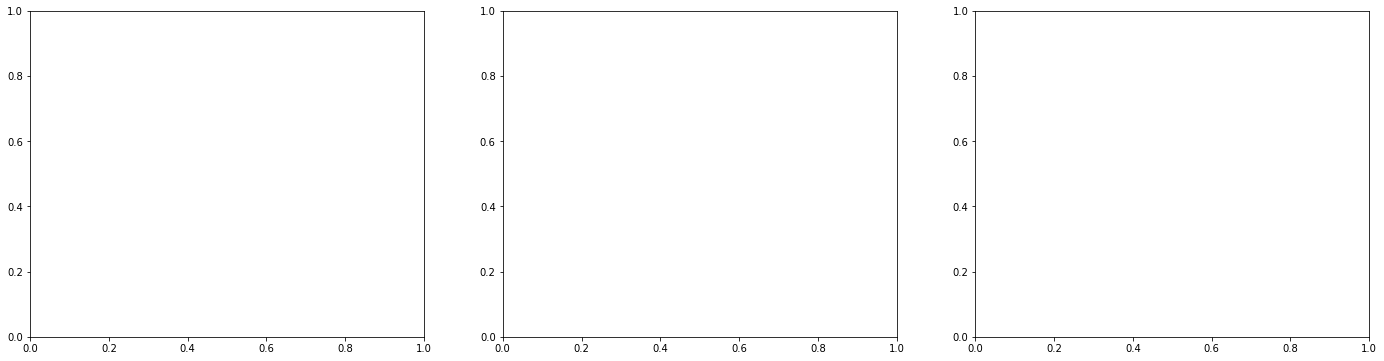

In [183]:
X = reversed(np.arange(N)/N)

ncols = 3
fig, axes = plt.subplots(figsize=(8*ncols,6), ncols=ncols)

ax = axes[0]
for N in N_values:
    ax.plot(X, np.array(num_comp_values[N])/N, label=N)
    ax.set_xlabel(r'$f$')
    ax.set_ylabel('Num comp')
    ax.legend()
    
ax = axes[1]
for N in N_values:
    ax.plot(X, np.array(N1_values[N])/N)
    ax.set_ylabel(r'$N_1$')
    ax.set_xlabel(r'$f$')
ax = axes[2]

for N in N_values:
    ax.plot(X, np.array(N2_values[N]))
    ax.set_ylabel(r'$N_2$')
    ax.set_xlabel(r'$f$')

plt.show()

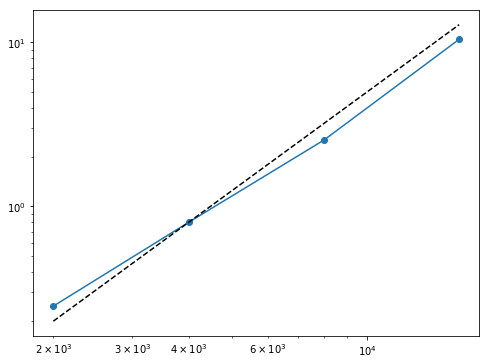

In [160]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(N_values, t_values, 'o-')

X = np.logspace(np.log10(N_values[0]), np.log10(N_values[-1]))
#Y = powerlaw(X, 1, 1e-5)
Y = powerlaw(X, 2, 5*1e-8)
ax.plot(X, Y, '--', color='k')

plt.show()

### RD attack

In [6]:
edgelist = [
    (0,3),
    (1,3),
    (2,3),
    (0,4),
    (0,5),
    (0,6),
    (0,7),
    (1,8),
    (1,9),
    (1,10),
    (2,11)
]

# ID should be [0, 1, 3, ...]
nn_set = edgelist_to_nn_set(edgelist)
print(nn_set)
order = ID_attack(nn_set)
N1_values = percolate(nn_set, order[::-1])
print(order)
print(N1_values)
print()

# RD should be [0, 1, 2, ...]
nn_set = edgelist_to_nn_set(edgelist)
order = RD_naive_attack(nn_set)
#nn_set = edgelist_to_nn_set(edgelist)
N1_values = percolate(nn_set, order[::-1])
print(order)
print(N1_values)
print()

# RD should be [0, 1, 2, ...]
nn_set = edgelist_to_nn_set(edgelist)
order = RD_attack(nn_set)
N1_values = percolate(nn_set, order[::-1])
print(order)
print(N1_values)

print('--------')



[{3, 4, 5, 6, 7}, {8, 9, 10, 3}, {11, 3}, {0, 1, 2}, {0}, {0}, {0}, {0}, {1}, {1}, {1}, {2}]
[0, 1, 3, 2, 11, 10, 9, 8, 7, 6, 5, 4]
[1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 7, 12]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 7, 12]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
--------


In [7]:
iterations = 10
t_values = []
for N, edgelist in edgelists.items():
    print(N)
    if N <= 10 or N > 128000:
        t_values.append(np.NaN)
        continue
    t_per_it = np.zeros(iterations)
    for i in range(iterations):
        start = time.time()
        nn_set = edgelist_to_nn_set(edgelist)
        order = RD_attack(nn_set)
        t = time.time() - start
        t_per_it[i] = t
    t_values.append(t_per_it.mean())

2000
4000
8000
16000
32000
64000


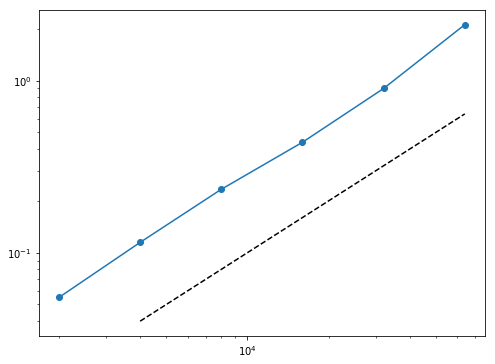

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(N_values, t_values, 'o-')

X = np.logspace(np.log10(N_values[1]), np.log10(N_values[-1]))
Y = powerlaw(X, 1, 1e-5)
#Y = powerlaw(X, 2, 1e-6)
ax.plot(X, Y, '--', color='k')

plt.show()

In [130]:
N = 1024000
edgelist = edgelists[N]
nn_set = edgelist_to_nn_set(edgelist)
order = RD_attack(nn_set)
nn_set = edgelist_to_nn_set(edgelist)
N1_values = percolate(nn_set, order[::-1])

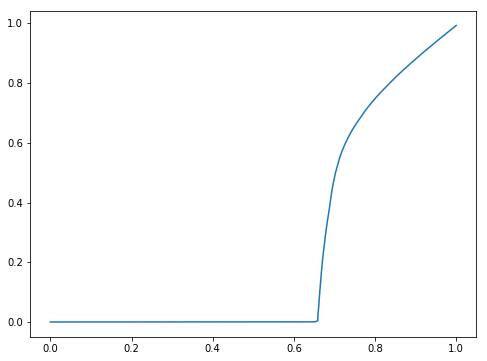

In [131]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(np.arange(N)/N, np.array(N1_values)/N, '-')

plt.show()

In [3]:
def _get_CI(nn_set, l=1):

    N = len(nn_set)
    deg_seq = [len(s) for s in nn_set]
    
    CI_values = np.zeros(N, dtype='int')
    for i in range(N):
        neighbors = nn_set[i]
        ball = 0
        for n in neighbors:
            ball += (deg_seq[n] - 1)
        CI_values[i] = (deg_seq[i] - 1) * ball
        
    return CI_values

def _ICI_attack(nn_set, l=1):
    CI_values = _get_CI(nn_set, l)
    order = np.argsort(CI_values)[::-1]
    return order.tolist()

def _create_CI_struct(_nn_set, l):
    
    nn_set = copy.deepcopy(_nn_set)
    N = len(nn_set)
    CI_seq = _get_CI(nn_set, l)
    CImax = np.max(CI_seq)
    assert(np.min(CI_seq) >= 0)
    CI_struct = []
    
    for j in range(CImax+1):
        CI_struct.append(set([]))
        
    for i, ci in enumerate(CI_seq):
        CI_struct[ci].add(i)
        
    return CI_struct

def _update_ci(v, w, nn_seq, deg_seq, CI_seq, distance=1):
    kv = deg_seq[v]
    kw = deg_seq[w]
    ci_w = CI_seq[w]
    
    common_nn = nn_set[v].intersection(nn_set[w])
    
    if distance == 1:
        w_neighbors = nn_set[w].difference(set([v]))

        s = 0
        #print(w_neighbors)
        for w_nn in w_neighbors:
            k_nn = deg_seq[w_nn]
            s += (k_nn - 1)
            #print(w_nn, k_nn, 's =', s)    

        new_ci_w = ci_w - (kw-1)*(kv-1) - s - (kw-2)*len(common_nn)
    elif distance == 2:
        new_ci_w = ci_w - (kw-1)*len(common_nn)
    return new_ci_w

def _RCI_attack(nn_set, l=1):
    
    N = len(nn_set)
    order = []
    deg_seq = [len(s) for s in nn_set]
    CI_seq = _get_CI(nn_set, l)
    CI_struct = _create_CI_struct(nn_set, l)
    CImax = len(CI_struct) - 1
    
    for j in range(N):
        while not CI_struct[CImax]:
            CImax = CImax - 1
        
        v = CI_struct[CImax].pop()
        order.append(v)
        
        ## Update CI structure
        first_neighbors = nn_set[v]
        for w in first_neighbors:
            
            ci_w = CI_seq[w]
            CI_struct[ci_w].remove(w)
            
            new_ci_w = _update_ci(v, w, nn_set, deg_seq, CI_seq, distance=1)
            CI_seq[w] = new_ci_w
            
            if new_ci_w >= 0:
                CI_struct[new_ci_w].add(w)
            
        second_neighbors = set([])
        for w in first_neighbors:
            second_neighbors = second_neighbors.union(nn_set[w])
        second_neighbors = second_neighbors.difference(first_neighbors)
        if v in second_neighbors:
            second_neighbors.remove(v)
        
        for w in second_neighbors:
            ci_w = CI_seq[w]
            CI_struct[ci_w].remove(w)
            new_ci_w = _update_ci(v, w, nn_set, deg_seq, CI_seq, distance=2)
            CI_seq[w] = new_ci_w
            if new_ci_w >= 0:
                CI_struct[new_ci_w].add(w)
        
        for w in first_neighbors:        
            deg_seq[w] = deg_seq[w] - 1
            nn_set[w].remove(v)
        nn_set[v].clear()
        deg_seq[v] = 0
        CI_seq[v] = 0

    return order


### Tests

edgelist = [
    (0,1),
    (0,2),
    (0,3),
    (0,4),
    (1,2),
    (1,4),
    (2,3),
    (2,6),
    (4,5)
]

nn_set = edgelist_to_nn_set(edgelist)
print(nn_set)

## Should be [0, 2, 1, 4, 3, ...]
order = _ICI_attack(nn_set, l=1)
print(order)
order = ICI_attack(nn_set, l=1)
print(order)

## Should be [0, 1, 2, ...]
order = _RCI_attack(nn_set, l=1)
print(order)
order = RCI_attack(nn_set, l=1)
print(order)

[{1, 2, 3, 4}, {0, 2, 4}, {0, 1, 3, 6}, {0, 2}, {0, 1, 5}, {4}, {2}]
[0, 2, 1, 4, 3, 6, 5]
[0, 2, 1, 4, 3, 6, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6]


In [15]:
N = 16000
nn_set = edgelist_to_nn_set(edgelists[N])

#%lprun -f ICI_attack ICI_attack(nn_set, l=1)
%lprun -f _RCI_attack _RCI_attack(nn_set, l=1)

Timer unit: 1e-06 s

Total time: 3.39548 s
File: <ipython-input-3-07cfac8f9357>
Function: _RCI_attack at line 64

Line #      Hits         Time  Per Hit   % Time  Line Contents

In [8]:
iterations = 1
t_values = []
for N, edgelist in edgelists.items():
    print(N)
    if N <= 10 or N > 16000:
        t_values.append(np.NaN)
        continue
    t_per_it = np.zeros(iterations)
    for i in range(iterations):
        start = time.time()
        nn_set = edgelist_to_nn_set(edgelist)
        order = RCI_attack(nn_set)
        t = time.time() - start
        t_per_it[i] = t
    t_values.append(t_per_it.mean())

2000
4000
8000
16000
32000
64000


/home/nahuel/anaconda3/envs/networks3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


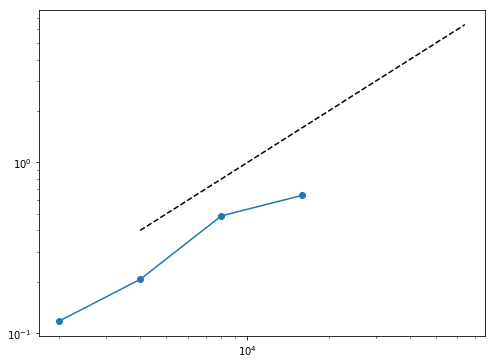

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(N_values, t_values, 'o-')

X = np.logspace(np.log10(N_values[1]), np.log10(N_values[-1]))
#Y = powerlaw(X, 1, 1e-5)
Y = powerlaw(X, 1, 1e-4)
#Y = powerlaw(X, 2, 1e-6)
ax.plot(X, Y, '--', color='k')

plt.show()

In [5]:
#N = 256000
#edgelist = edgelists[N]

N = 10000
g = ig.Graph().K_Regular(N, 3)
edgelist = []
for e in g.es():
    edgelist.append(e.tuple)

In [6]:
print('ID')
nn_set = edgelist_to_nn_set(edgelist)
order = ID_attack(nn_set)
nn_set = edgelist_to_nn_set(edgelist)
N1_values_ID = percolate(nn_set, order[::-1])

print('RD')
nn_set = edgelist_to_nn_set(edgelist)
order = RD_attack(nn_set)
nn_set = edgelist_to_nn_set(edgelist)
N1_values_RD = percolate(nn_set, order[::-1])

print('ICI')
nn_set = edgelist_to_nn_set(edgelist)
order = ICI_attack(nn_set, l=1)
nn_set = edgelist_to_nn_set(edgelist)
N1_values_ICI = percolate(nn_set, order[::-1])

print('RCI')
nn_set = edgelist_to_nn_set(edgelist)
order = RCI_attack(nn_set, l=1)
nn_set = edgelist_to_nn_set(edgelist)
N1_values_RCI = percolate(nn_set, order[::-1])

print('ICI 2')
nn_set = edgelist_to_nn_set(edgelist)
order = ICI_attack(nn_set, l=2)
nn_set = edgelist_to_nn_set(edgelist)
N1_values_ICI_2 = percolate(nn_set, order[::-1])

print('RCI 2')
nn_set = edgelist_to_nn_set(edgelist)
order = RCI_attack(nn_set, l=2)
nn_set = edgelist_to_nn_set(edgelist)
N1_values_RCI_2 = percolate(nn_set, order[::-1])

ID
RD
ICI
RCI
ICI 2
RCI 2


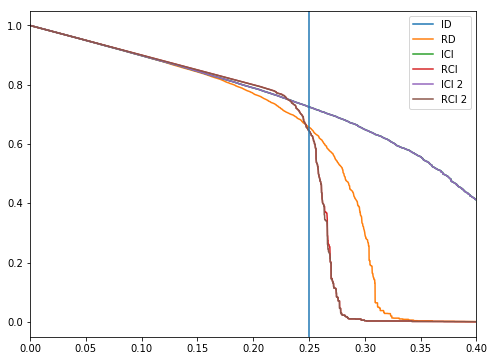

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
X = (np.arange(N)/N)[::-1]
ax.plot(X, np.array(N1_values_ID)/N, '-', label='ID')
ax.plot(X, np.array(N1_values_RD)/N, '-', label='RD')
ax.plot(X, np.array(N1_values_ICI)/N, '-', label='ICI')
ax.plot(X, np.array(N1_values_RCI)/N, '-', label='RCI')
ax.plot(X, np.array(N1_values_ICI_2)/N, '-', label='ICI 2')
ax.plot(X, np.array(N1_values_RCI_2)/N, '-', label='RCI 2')
ax.set_xlim(0, 0.4)
#ax.axvline(0.2116)
ax.axvline(0.25)

ax.legend()
plt.show()

In [ ]:
def get_CI(nn_set, l):
    """
    Compute Collective Influence up to length 'l'

        CI_i = (k_i - 1) * sum_{j in Ball(i, l)} (k_j - 1)

    Arguments:
        nn_set {[type]} -- [description]
        l {[type]} -- [description]

    Returns:
        [type] -- [description]
    """

    deg_seq = [len(s) for s in nn_set]

    CI_values = []
    for i, k_i in enumerate(deg_seq):
        ball_nodes = get_neighbors_ball(nn_set, i, l)
        ball_deg = sum([(deg_seq[n] - 1) for n in ball_nodes])
        CI_values.append((k_i - 1) * ball_deg)

    return CI_values

def ICI_attack(edgelist, l):
    """
    Attack based on Initial Collective Influence centrality
    with ball distance 'l'.
    Complexity: o(N^2)

    Arguments:
        nn_set {list} -- List of neighor sets for each node
        l {int} -- Length of ball
    Returns:
        list -- Order in which the nodes have been removed
    """
    
    nn_set = edgelist_to_nn_set(edgelist)

    CI_values = get_CI(nn_set, l)
    order = np.argsort(CI_values)[::-1]
    return order.tolist()